<a href="https://colab.research.google.com/github/joon-11/learnAI/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets.mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data(path='mnist.npz')

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
print(x_train.shape, y_train.shape)
print(y_train)

print(x_test.shape, y_test.shape)
print(y_test)

(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


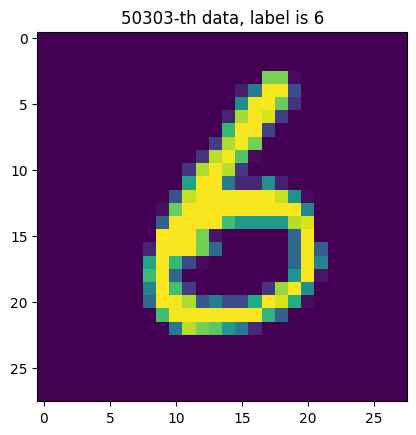

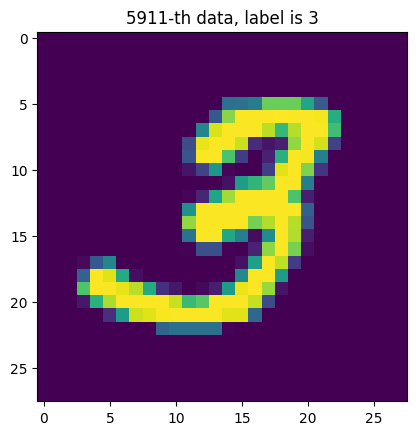

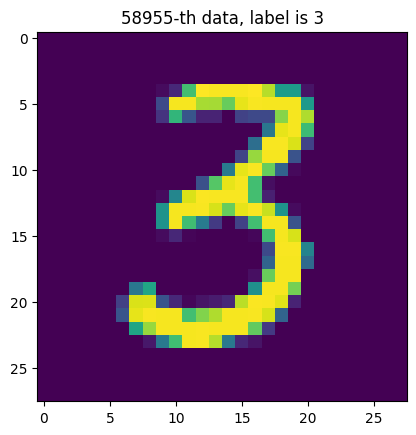

In [3]:
import matplotlib.pyplot as plt
import numpy as np

sample_size = 3
random_idx = np.random.randint(60000, size = sample_size)

for idx in random_idx:
  img = x_train[idx, :]
  label = y_train[idx]
  plt.figure()
  plt.imshow(img)
  plt.title('%d-th data, label is %d' %(idx, label))

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = 0.3,
                                                  random_state= 777)
print(f'훈련데이터{x_train.shape} 레이블 {y_train.shape}')
print(f'검증데이터{x_val.shape} 레이블 {y_val.shape}')

훈련데이터(42000, 28, 28) 레이블 (42000,)
검증데이터(18000, 28, 28) 레이블 (18000,)


In [5]:
num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

x_train = (x_train.reshape((num_x_train, 28 * 28)))/255
x_val = (x_val.reshape((num_x_val, 28 * 28)))/255
x_test = (x_test.reshape((num_x_test, 28 * 28)))/255

print(x_train.shape)

(42000, 784)


In [6]:
len(x_train[0])

784

In [7]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [8]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

print(y_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [9]:
len(y_train)

42000

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(64, activation = 'relu', input_shape = (784, )))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [11]:
def softmax(arr):
  m = np.max(arr)
  arr = arr - m
  arr = np.exp(arr)
  return arr / np.sum(arr)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

case_1 = np.array([3.1, 3.0, 2.9])
case_2 = np.array([2.0, 1.0, 0.7])

np.set_printoptions(precision = 3)
print(f'sigmoid {sigmoid(case_1)}, softmax{softmax(case_1)}')
print(f'sigmoid {sigmoid(case_2)}, softmax{softmax(case_2)}')

sigmoid [0.957 0.953 0.948], softmax[0.367 0.332 0.301]
sigmoid [0.881 0.731 0.668], softmax[0.61  0.224 0.166]


In [12]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

In [13]:
print(x_train.shape)
print(y_train.shape)

(42000, 784)
(42000, 10)


In [14]:
history = model.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 128,
                    validation_data = (x_val, y_val))

Epoch 1/30
329/329 [==============================] - 7s 10ms/step - loss: 0.5007 - acc: 0.8595 - val_loss: 0.2471 - val_acc: 0.9281
Epoch 2/30
329/329 [==============================] - 3s 9ms/step - loss: 0.2140 - acc: 0.9392 - val_loss: 0.1925 - val_acc: 0.9433
Epoch 3/30
329/329 [==============================] - 3s 8ms/step - loss: 0.1617 - acc: 0.9532 - val_loss: 0.1590 - val_acc: 0.9535
Epoch 4/30
329/329 [==============================] - 5s 14ms/step - loss: 0.1297 - acc: 0.9613 - val_loss: 0.1390 - val_acc: 0.9586
Epoch 5/30
329/329 [==============================] - 3s 8ms/step - loss: 0.1060 - acc: 0.9681 - val_loss: 0.1287 - val_acc: 0.9618
Epoch 6/30
329/329 [==============================] - 3s 8ms/step - loss: 0.0901 - acc: 0.9736 - val_loss: 0.1185 - val_acc: 0.9657
Epoch 7/30
329/329 [==============================] - 3s 8ms/step - loss: 0.0769 - acc: 0.9763 - val_loss: 0.1167 - val_acc: 0.9651
Epoch 8/30
329/329 [==============================] - 1s 5ms/step - loss: 

In [15]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

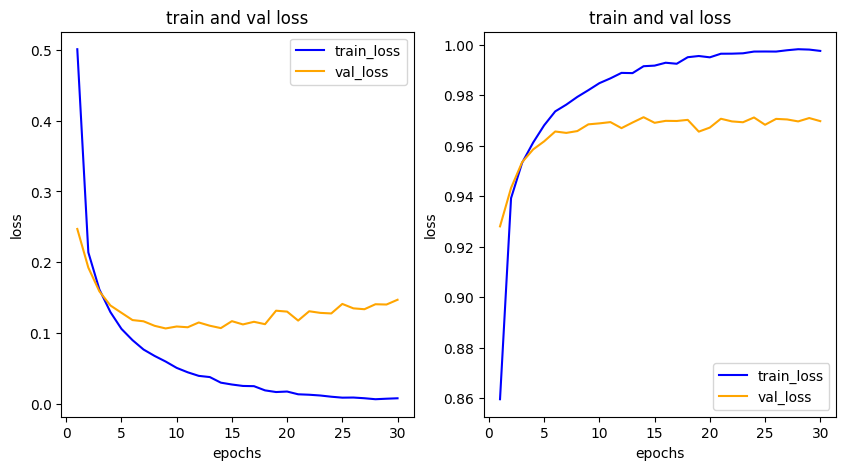

In [16]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_loss')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_loss')
ax2.set_title('train and val loss')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()


In [17]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1279 - acc: 0.9725


[0.12791018187999725, 0.9725000262260437]

In [18]:
import numpy as np

results = model.predict(x_test)
print(results.shape)
np.set_printoptions(precision = 7)
print(f'각 클래스에 속할 확률 : \n{results [0]}')

313/313 [==============================] - 1s 2ms/step
(10000, 10)
각 클래스에 속할 확률 : 
[1.1958582e-12 2.2400575e-09 7.1576679e-08 1.2311644e-05 7.2466657e-20
 8.9720807e-11 1.3542725e-21 9.9998754e-01 1.7659638e-10 2.3471046e-08]


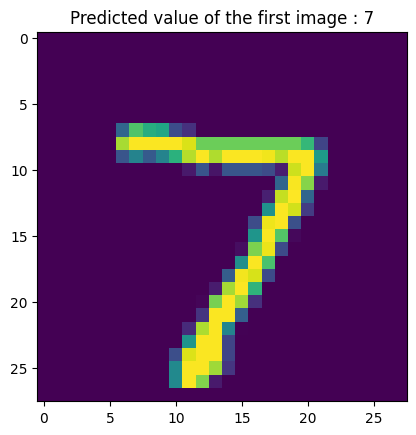

In [19]:
import matplotlib.pyplot as plt

arg_results = np.argmax(results, axis = -1)
plt.imshow(x_test[0].reshape(28,28))
plt.title('Predicted value of the first image : ' + str(arg_results[0]))
plt.show()

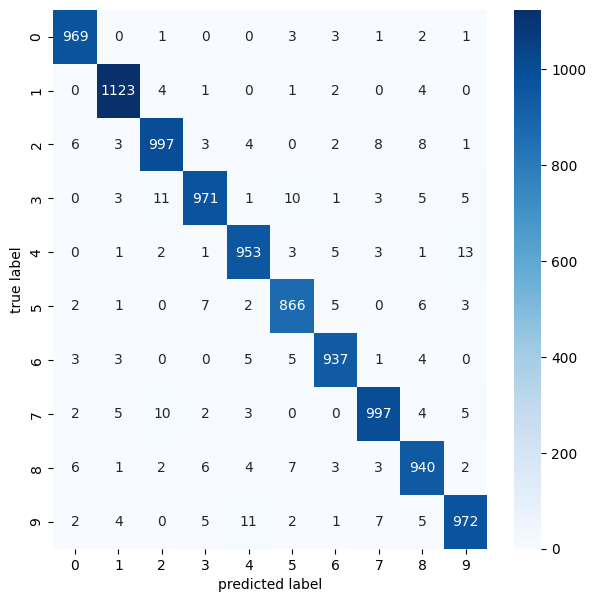

In [20]:
#모델 평가 -1 혼동행렬

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (7,7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [21]:
#모델평가방법 -2 분류보고서
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))

# Precision(정밀도): 예측한 클래스 중 실제로 해당 클래스인 데이터의 비율입니다.
# Recall(재현율): 실제 클래스 중 예측한 클래스와 일치한 데이터의 비율입니다.
# F1-score: Precision과 Recall의 조화평균입니다.
# Support: 각 클래스의 실제 데이터 수입니다.


               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.96      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.97      0.96       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [22]:
from tensorflow.keras.datasets.fashion_mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape, x_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


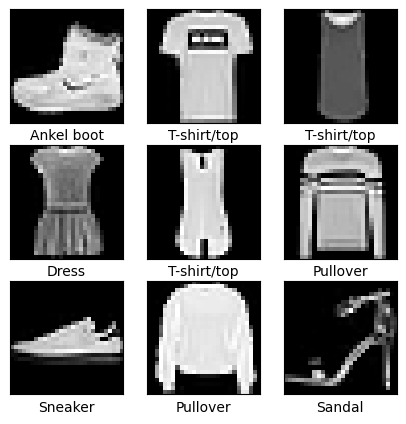

In [23]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankel boot']

sample_size = 9
random_idx = np.random.randint(60000, size = sample_size)

plt.figure(figsize = (5, 5))
for i, idx in enumerate(random_idx):
  plt.subplot(3, 3, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap = 'gray')
  plt.xlabel(class_names[y_train[i]])

plt.show()

In [24]:
x_train = x_train / 255
x_test = x_test / 255

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state=777)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

first_model = Sequential()

first_model.add(Flatten(input_shape=(28, 28)))
first_model.add(Dense(64, activation = 'relu'))
first_model.add(Dense(32, activation = 'relu'))
first_model.add(Dense(10, activation = 'softmax'))


In [26]:
first_model.compile(optimizer = 'Adam',loss = 'categorical_crossentropy',metrics=['acc'])

first_history = first_model.fit(x_train, y_train, batch_size = 128, epochs=30, validation_data=(x_val,y_val))

Epoch 1/30
329/329 [==============================] - 4s 8ms/step - loss: 0.6616 - acc: 0.7734 - val_loss: 0.4822 - val_acc: 0.8298
Epoch 2/30
329/329 [==============================] - 2s 5ms/step - loss: 0.4416 - acc: 0.8428 - val_loss: 0.4257 - val_acc: 0.8508
Epoch 3/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3980 - acc: 0.8590 - val_loss: 0.3994 - val_acc: 0.8578
Epoch 4/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3743 - acc: 0.8662 - val_loss: 0.3786 - val_acc: 0.8654
Epoch 5/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3541 - acc: 0.8723 - val_loss: 0.3841 - val_acc: 0.8642
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.3409 - acc: 0.8765 - val_loss: 0.3575 - val_acc: 0.8736
Epoch 7/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3278 - acc: 0.8812 - val_loss: 0.3761 - val_acc: 0.8654
Epoch 8/30
329/329 [==============================] - 2s 6ms/step - loss: 0.

In [27]:
second_model = Sequential()

second_model.add(Flatten(input_shape=(28, 28)))
second_model.add(Dense(128, activation = 'relu'))
second_model.add(Dense(64, activation = 'relu'))
second_model.add(Dense(32, activation = 'relu'))
second_model.add(Dense(10, activation = 'softmax'))

second_model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy',metrics=['acc'])
second_history = second_model.fit(x_train, y_train, batch_size = 128, epochs=30, validation_data=(x_val,y_val))

Epoch 1/30
329/329 [==============================] - 4s 8ms/step - loss: 0.6069 - acc: 0.7941 - val_loss: 0.4500 - val_acc: 0.8363
Epoch 2/30
329/329 [==============================] - 2s 6ms/step - loss: 0.4191 - acc: 0.8504 - val_loss: 0.4124 - val_acc: 0.8512
Epoch 3/30
329/329 [==============================] - 2s 7ms/step - loss: 0.3756 - acc: 0.8647 - val_loss: 0.3747 - val_acc: 0.8619
Epoch 4/30
329/329 [==============================] - 2s 7ms/step - loss: 0.3471 - acc: 0.8734 - val_loss: 0.3566 - val_acc: 0.8714
Epoch 5/30
329/329 [==============================] - 2s 7ms/step - loss: 0.3265 - acc: 0.8801 - val_loss: 0.3342 - val_acc: 0.8801
Epoch 6/30
329/329 [==============================] - 3s 10ms/step - loss: 0.3078 - acc: 0.8864 - val_loss: 0.3491 - val_acc: 0.8754
Epoch 7/30
329/329 [==============================] - 2s 6ms/step - loss: 0.2987 - acc: 0.8898 - val_loss: 0.3347 - val_acc: 0.8775
Epoch 8/30
329/329 [==============================] - 2s 7ms/step - loss: 0

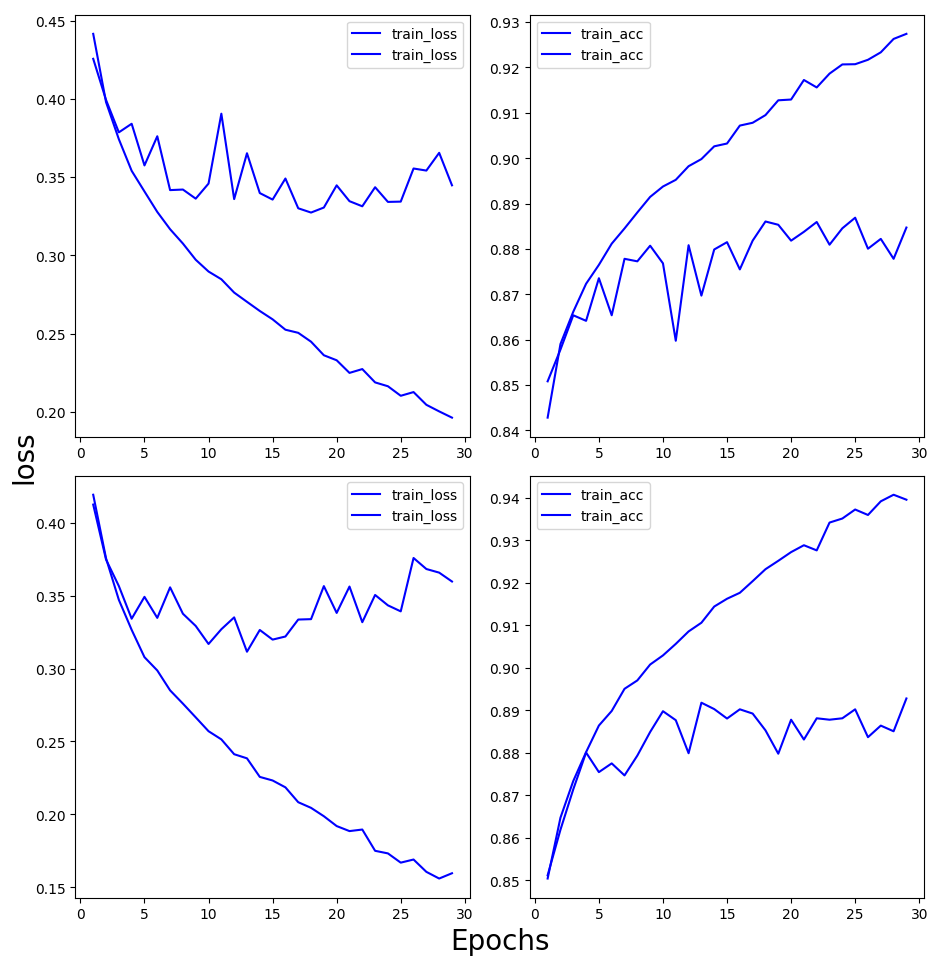

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def draw_loss_acc(history_1, history_2, epochs):
  his_dict_1 = history_1.history
  his_dict_2 = history_2.history
  keys = list(his_dict_1.keys())

  epochs = range(1, epochs)
  fig = plt.figure(figsize = (10, 10))
  ax = fig.add_subplot(1,1,1)

  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_color('none')
  ax.spines['left'].set_color('none')
  ax.spines['right'].set_color('none')
  ax.tick_params(labelcolor = 'w', top=False, bottom = False, left = False, right = False)

  for i in range(len(his_dict_1)):
    temp_ax = fig.add_subplot(2,2,i+1)
    temp = keys[i%2]
    val_temp = keys[(i+2)%2 + 2]
    temp_history = his_dict_1 if i < 2 else his_dict_2
    temp_ax.plot(epochs, temp_history[temp][1:],
                 color = 'blue', label = 'train_' + temp)
    temp_ax.plot(epochs, temp_history[val_temp][1:],
                 color = 'blue', label = 'train_' + temp)
    if(i == 1 or i == 3):
      start, end = temp_ax.get_ylim()
      temp_ax.yaxis.set_ticks(np.arange(np.round(start, 2), end, 0.01))
    temp_ax.legend()
  ax.set_ylabel('loss', size = 20)
  ax.set_xlabel('Epochs', size = 20)
  plt.tight_layout()
  plt.show()

draw_loss_acc(first_history, second_history, 30)


In [30]:
from tensorflow.keras.datasets.boston_housing import load_data

(x_train, y_train), (x_test, y_test) = load_data(path = 'boston_housing.npz',
                                                 test_split=0.2,
                                                 seed=777)

57026/57026 [==============================] - 0s 0us/step


In [31]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [32]:
import numpy as np

mean = np.mean(x_train, axis = 0)
std = np.std(x_train, axis = 0)

x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
                                                  test_size = 0.33,
                                                  random_state= 777)


In [35]:
from sklearn.utils import validation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (13, )))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse', metrics=['mae'])
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 8ms/step - loss: 669.7926 - mae: 24.1811


[669.7926025390625, 24.18107032775879]

In [36]:
history = model.fit(x_train, y_train, epochs = 300, validation_data= (x_val, y_val))
model.evaluate(x_test, y_test)

Epoch 1/300
9/9 [==============================] - 1s 14ms/step - loss: 562.4984 - mae: 21.9680 - val_loss: 612.7020 - val_mae: 22.4380
Epoch 2/300
9/9 [==============================] - 0s 8ms/step - loss: 535.1931 - mae: 21.3589 - val_loss: 586.3729 - val_mae: 21.8455
Epoch 3/300
9/9 [==============================] - 0s 8ms/step - loss: 511.3313 - mae: 20.7731 - val_loss: 558.5806 - val_mae: 21.2164
Epoch 4/300
9/9 [==============================] - 0s 9ms/step - loss: 484.8197 - mae: 20.1431 - val_loss: 527.5934 - val_mae: 20.4954
Epoch 5/300
9/9 [==============================] - 0s 8ms/step - loss: 454.7849 - mae: 19.3996 - val_loss: 491.4806 - val_mae: 19.6383
Epoch 6/300
9/9 [==============================] - 0s 6ms/step - loss: 419.1819 - mae: 18.5156 - val_loss: 449.5587 - val_mae: 18.5895
Epoch 7/300
9/9 [==============================] - 0s 8ms/step - loss: 378.2448 - mae: 17.4717 - val_loss: 401.5898 - val_mae: 17.3271
Epoch 8/300
9/9 [==============================] - 0s 

[9.708976745605469, 2.203052282333374]

In [39]:
#k-fold
from sklearn.model_selection import KFold

k = 3
kfold = KFold(n_splits = k, random_state = 777, shuffle=True)

def get_model():
  model = Sequential()
  model.add(Dense(64, activation = 'relu', input_shape = (13, )))
  model.add(Dense(32, activation = 'relu'))
  model.add(Dense(1))

  model.compile(optimizer = 'adam', loss = 'mse', metrics=['mae'])

  return model

mae_list = []

for train_index, val_index in kfold.split(x_train):
  x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
  y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

  model = get_model()

  model.fit(x_train_fold, y_train_fold, epochs = 300, validation_data=(x_val_fold, y_val_fold))

  _, test_mae = model.evaluate(x_test, y_test)
  mae_list.append(test_mae)

Epoch 1/300
6/6 [==============================] - 2s 164ms/step - loss: 544.5536 - mae: 21.6741 - val_loss: 518.0019 - val_mae: 21.2245
Epoch 2/300
6/6 [==============================] - 0s 16ms/step - loss: 523.5313 - mae: 21.1739 - val_loss: 497.2504 - val_mae: 20.7149
Epoch 3/300
6/6 [==============================] - 0s 16ms/step - loss: 503.5076 - mae: 20.6800 - val_loss: 476.8018 - val_mae: 20.2046
Epoch 4/300
6/6 [==============================] - 0s 19ms/step - loss: 482.9181 - mae: 20.1801 - val_loss: 455.4919 - val_mae: 19.6589
Epoch 5/300
6/6 [==============================] - 0s 15ms/step - loss: 461.3574 - mae: 19.6390 - val_loss: 432.4814 - val_mae: 19.0580
Epoch 6/300
6/6 [==============================] - 0s 17ms/step - loss: 438.1455 - mae: 19.0404 - val_loss: 407.0696 - val_mae: 18.3801
Epoch 7/300
6/6 [==============================] - 0s 17ms/step - loss: 412.4049 - mae: 18.3699 - val_loss: 378.6999 - val_mae: 17.6158
Epoch 8/300
6/6 [==============================

In [41]:
print(mae_list)
print(np.mean(mae_list))

[2.34243106842041, 2.2449662685394287, 2.2417049407958984]
2.276367425918579
